# Naive Bayes
Implementing the Naive Bayes algorithm. Using the **house-votes-84** data to predict whether a candidate is a republican or a democrat based on 16 political views
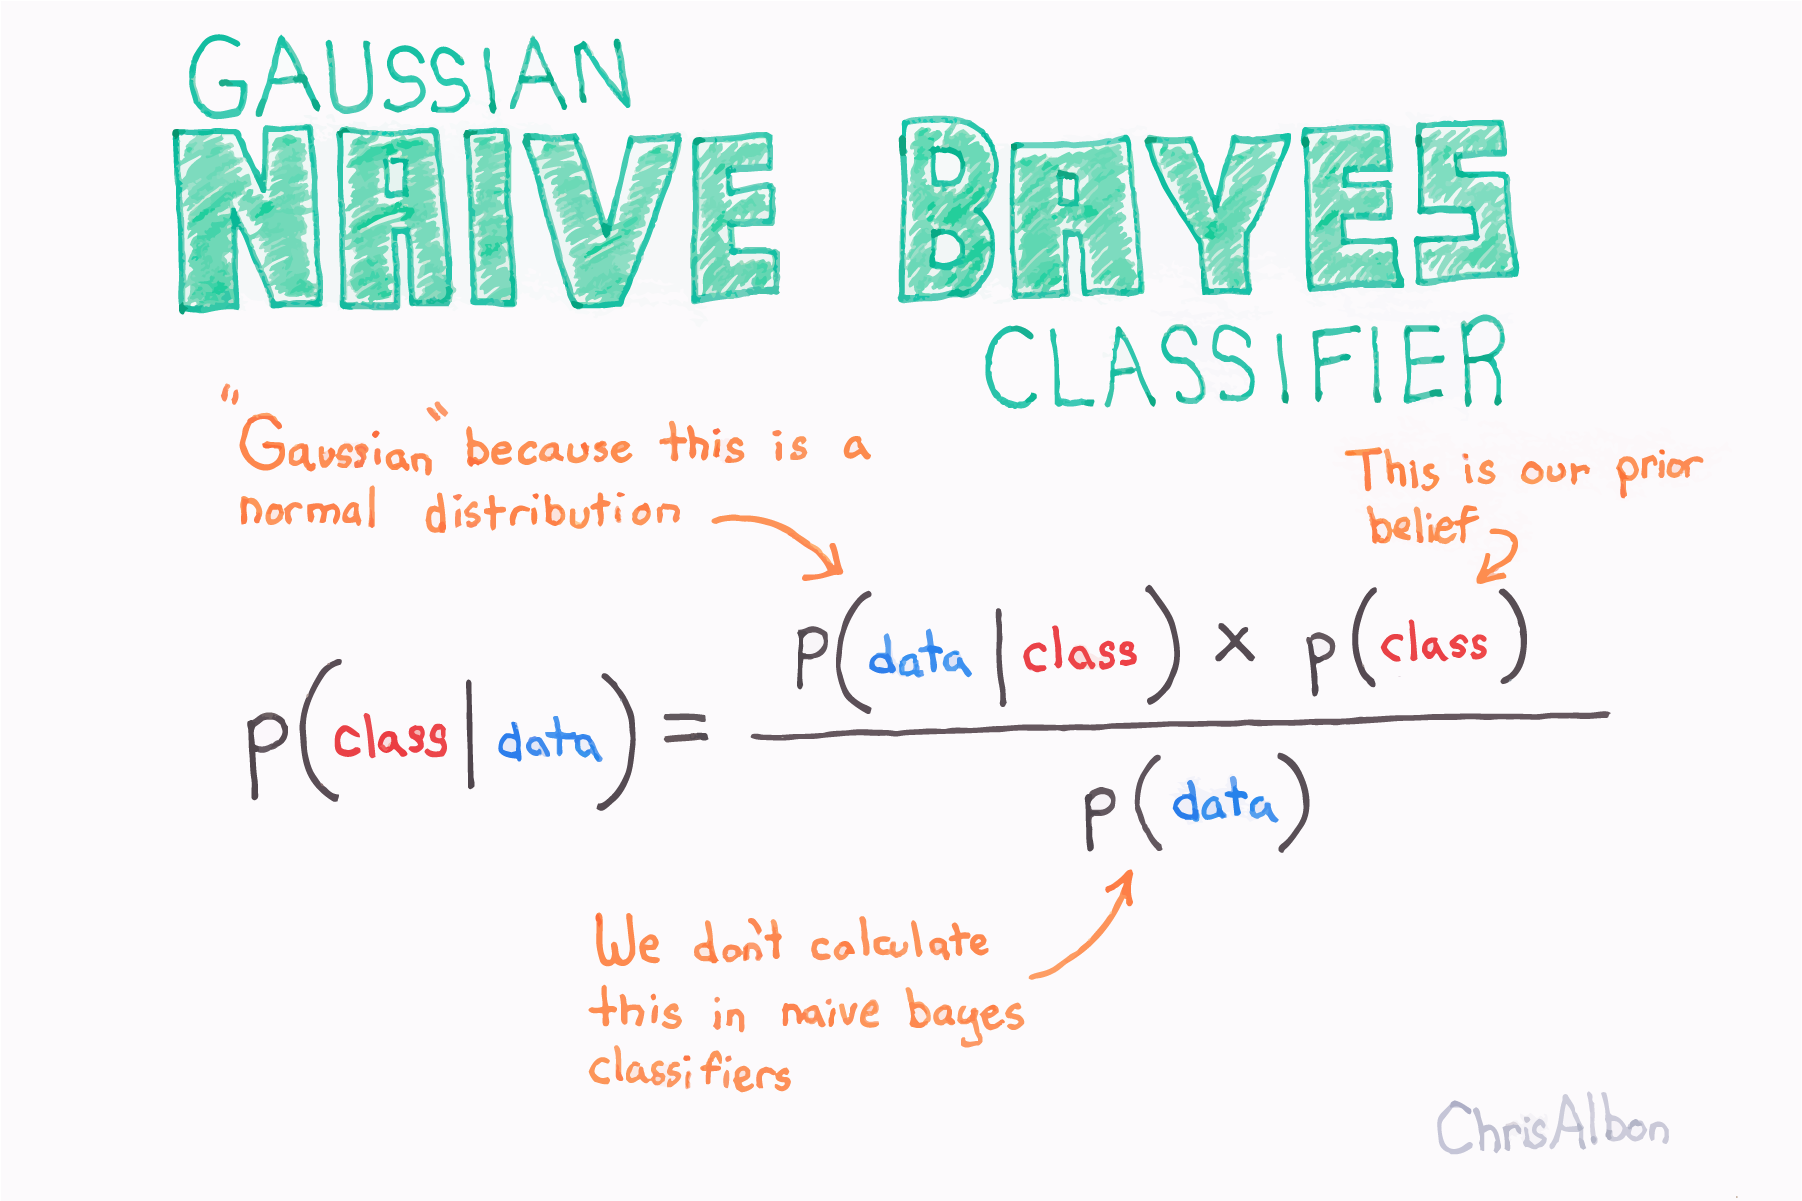

In [309]:
#Imports
import pandas as pd
import numpy as np

Loading data

In [276]:
df = pd.read_csv("data\house-votes-84.data.csv",header=None)

In [277]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Adding the real names for the colums would look better

In [278]:
df.columns = ['Class Name',
              'handicapped-infants',
              'water-project-cost-sharing',
              'adoption-of-the-budget-resolution', 
              'physician-fee-freeze',
              'el-salvador-aid',
              'religious-groups-in-schools',
              'anti-satellite-test-ban',
              'aid-to-nicaraguan-contras',
              'mx-missile',
              'immigration',
              'synfuels-corporation-cutback',
              'education-spending',
              'superfund-right-to-sue',
              'crime',
              'duty-free-exports',
              'export-administration-act-south-africa']

In [279]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [280]:
df['handicapped-infants'].describe()

count     435
unique      3
top         n
freq      236
Name: handicapped-infants, dtype: object

In [281]:
df = df.replace('?', np.nan)

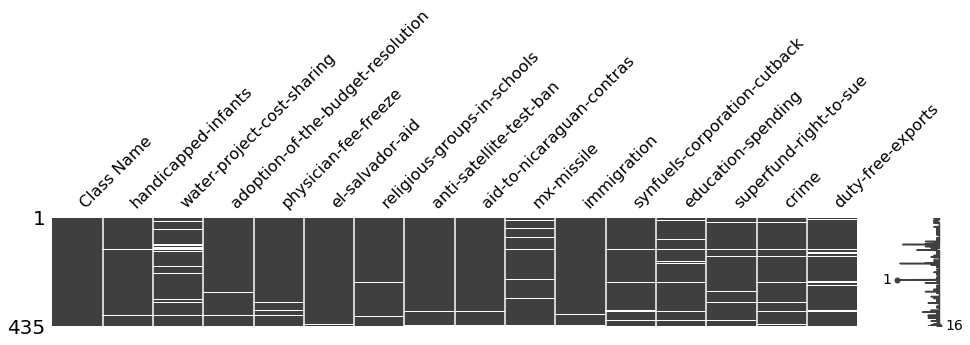

In [282]:
import missingno as msno

msno.matrix(df.iloc[:,0:16],figsize=(16,2))

In [283]:
df = df.sample(frac=1)

In [284]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
167,republican,y,n,y,y,y,y,y,y,n,y,y,y,n,y,y,y
46,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y
416,republican,y,y,n,y,y,y,n,n,n,y,n,n,y,y,n,y
18,republican,n,y,n,y,y,y,n,n,n,n,n,NaN,y,y,n,n
131,democrat,n,n,y,n,n,y,n,y,y,y,n,n,n,y,n,y


## Binning
Splitting the dataset into bins

In [285]:
bins = np.array_split(df, 10)

In [286]:
bins[1].describe()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,44,42,39,42,41,43,44,43,43,42,44,42,40,42,41,41,36
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,n,n,y,y,y,y,n,n,n,n,y,y,n,y
freq,26,26,20,21,21,22,27,26,24,22,24,26,24,22,26,27,28


In [287]:
trainBins = np.array_split(df, 10)
trainBins.remove(trainBins[0])    

In [288]:
trainSet = pd.concat(trainBins)

In [289]:
trainSet.describe()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,391,380,346,381,381,378,382,381,380,372,385,374,367,370,377,367,297
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,n,y,y,y,y,n,n,n,y,y,n,y
freq,243,216,174,227,223,191,243,216,220,189,193,236,209,188,221,211,242


## Algorithm

We need a way to keep the probabilities for each column value. Something like - ['republican']['mx-missile']['y']

In [290]:
dict = {}

In [291]:
dict['democrat'] = {}

In [292]:
dict['democrat']['mx-missile'] = {}

In [293]:
dict['democrat']['mx-missile']['y'] = 0.4

In [294]:
dict['democrat']['mx-missile']['y']

0.4

### Probability for column

In [295]:
pd.crosstab(df['Class Name'], df['mx-missile'])

mx-missile,n,y
Class Name,,
democrat,60,188
republican,146,19


In [296]:
len(df[(df['Class Name'] == 'democrat') & (df['mx-missile'] == 'n')])

60

In [297]:
len(df[(df['Class Name'] == 'democrat')])

267

In [298]:
for value in df['mx-missile'].unique():
    print(value)

n
y
nan


## The algorithm itself
On creating it calculates all the needed probabilities. Then the Predict function could then be used to predict the class of the row given.

In [299]:
import operator

class NaiveBayes:
    
    #Calculate value probabilities
    def __init__(self, df, yColumnName):
        #Probability for each predict value
        self.predictValueProbability = {}

        for predictValue in df[yColumnName].unique():
            self.predictValueProbability[predictValue] = len(df[(df[yColumnName] == predictValue)]) / len(df) 

        #Probability for each column value    
        self.columnValueProbabilities = {}

        #All unique values that could be predicted
        for predictValue in df[yColumnName].unique():
            self.columnValueProbabilities[predictValue] = {}

            #All columns
            for columnName in df.columns:
                self.columnValueProbabilities[predictValue][columnName] = {}

                #All unique values a column has
                for columnValue in df[columnName].unique():
                    predictValueCount = len(df[(df[yColumnName] == predictValue)])
                    predictValueWhichAreColumnValue = len(df[(df[yColumnName] == predictValue) & (df[columnName] == columnValue)])

                    probability = predictValueWhichAreColumnValue / predictValueCount
                    
                    self.columnValueProbabilities[predictValue][columnName][columnValue] = probability
        
    def Predict(self, row):
        #Calculate score for each prediction possibility
        predictions = {}
        
        for key, value in self.predictValueProbability.items():
            #Add probability for predict class
            predictions[key] = self.predictValueProbability[key]

            #Add probabilities for each of the columns
            for columnName in row.columns:
                predictions[key] = predictions[key] * self.columnValueProbabilities[key][columnName][row[columnName].iloc[0]]
                
        #Return the class with the highest probability
        return max(predictions.items(), key = operator.itemgetter(1))[0]

In [300]:
nb = NaiveBayes(trainSet, 'Class Name')

In [301]:
nb.Predict(df.iloc[1:2].drop(['Class Name'], axis=1))

'democrat'

## Calculating accuracy using binning

In [308]:
binCount = 10
bins = np.array_split(df, binCount)

#Take each bin as a test set and combine the rest into train set
for i in range(binCount):
    trainSet = pd.concat(bins[:i] + bins[i + 1:])    
    testBinY = bins[i]['Class Name']
    testBinX = bins[i].drop('Class Name', axis=1)
    
    #Create the Naive Bayes classifier. Probabilities are calculated at creation.
    nb = NaiveBayes(trainSet, 'Class Name') 
    rowCount = testBinX.shape[0]
    correctCount = 0

    #
    for rowIndex in range(rowCount):
        prediction = nb.Predict(testBinX[rowIndex: rowIndex + 1])
        correctClass = testBinY.iloc[rowIndex: rowIndex + 1].iloc[0]
        
        if (prediction == correctClass):
            correctCount = correctCount + 1
    
    #Print accuracy
    accuracy = 100 * float(correctCount)/float(rowCount)
    print('Bin', i, '-', round(accuracy, 2), '%')

Bin 0 - 63.64 %
Bin 1 - 68.18 %
Bin 2 - 52.27 %
Bin 3 - 63.64 %
Bin 4 - 61.36 %
Bin 5 - 65.12 %
Bin 6 - 62.79 %
Bin 7 - 53.49 %
Bin 8 - 65.12 %
Bin 9 - 67.44 %
